# <center> AML 2203 - Advanced Python AI and ML Tools</center>

# Assignment #1 

# "Clustering on TripAdvisor reviews Restuarant Dataset" 


### Group Members

- Aishlee C0913045
- Aniketh Vaglapuram C0903304
- Dev Parmar C0908036
- Guruprasad Tandlekar C0902813
- Siddharth Yadav C0907985

# Dataset Description and Specification

For this assignment, we aim to __cluster the reviews given by users to the restaurant__. We will develop clustering models, investigate various word vectorization techniques, and analyze the outcomes. 

We analyze datasets, preprocess them, create unsupervised models, vectorize words, and assess them.

In total, we have a dataset with 676 rows and 5 features.

Features Provided for Each Record:

- __NAME:__ Name of the restaurant (1 to 5 stars).
- __DATE:__ Date on which the review was posted by the user.
- __RATINGS:__ Ratings given by the user out of 50.
- __TITLE:__ Title which was assigned to the review by the user.
- __REVIEWS:__  The actual feedback/review posted for the restaurant by the reviewer.


### Import the necessary libraries for the analysis

In [1]:
# importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import glob
import regex as re
from wordcloud import STOPWORDS, WordCloud
import nltk
import string
import plotly.express as px
import warnings
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster import hierarchy
warnings.filterwarnings('ignore')

C:\Users\anike\anconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


__Loading the dataset from the our scraped files__

In [2]:
# We had scraped the reviews for each restaurant in different data files, reading all of them at once
all_files = glob.glob('D:/Term-2/AML Project/*.csv')
df1 = pd.concat((pd.read_csv(f) for f in all_files))
og = pd.DataFrame(df1)
og = pd.set_option('display.max_colwidth', None)

__Creating a copy for our use__

In [3]:
df = df1.copy()

__Dimension (rows, columns) in the dataset__

In [4]:
df.shape

(676, 5)

__Display the column names__

In [5]:
df.columns

Index(['NAME', 'DATE', 'RATINGS', 'TITLE', 'REVIEWS'], dtype='object')

__Datatypes of each feature of the dataset__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NAME     676 non-null    object
 1   DATE     676 non-null    object
 2   RATINGS  676 non-null    int64 
 3   TITLE    676 non-null    object
 4   REVIEWS  676 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.7+ KB


__Display the first five rows of the dataset__

In [7]:
df.head()

,NAME,DATE,RATINGS,TITLE,REVIEWS
0,Casa Manila,19-09-2022,40,Danforth location new fave,"Vegan menu is dope. love the sizzling Tofu love the vegan adobo and Garlic rice that dessert is nice too. Did find the afternoon sunday lunch adobo portion to be small however. Shrinkflation perhaps as cost saving? Calamansi Mojito was nice, refreshing even."
1,Casa Manila,19-12-2021,10,Portions too small,"The price is high enough but the portion is unbelievably small and their serving plates are all oversize to give you the impression it's a big order. The taste is questionable of late, maybe new cook?"
2,Casa Manila,26-05-2021,50,TRY THE DEEP FRIED CHICKEN SKINS,"Saw it on ""you gotta eat here"" , tried the deep fried chicken skins, amazing with a little salt, very good"
3,Casa Manila,07-09-2020,10,Sour Kare-kare,"The service was slow, it took ages for our food to come. And the Kare-kare they served us taste sour and smells funky I have the feeling it is spoiled coz my wife had diarhea. When we complained about it they said it taste normal...More"
4,Casa Manila,29-12-2019,40,Very good,"Decor and tropical ambience is attractive. The food is always good. We sometimes come and have dinner as a large family group...this time was no exception. Everyone left, full and happy."


### Data Exploration

In [8]:
df.REVIEWS = df.REVIEWS.astype('string')
df.TITLE = df.TITLE.astype('string')

In [9]:
df.isnull().sum()

NAME       0
DATE       0
RATINGS    0
TITLE      0
REVIEWS    0
dtype: int64

In [10]:
print(Counter(df.REVIEWS).most_common(10))

[('This is just a McDonalds and I have only gone there for coffee. During McDonalds specialty coffee promotions I have been known to whip into this one. But I find it less convenient than some.', 5), ("We enjoyed an evening with friends here a few nights ago. We were pleasantly surprised at how tasty the dishes were that we ordered. Typical pub fare but a nice menu. Service was friendly. We'll definitely be back.", 5), ('OK, took my son in, we ordered a pizza....I cannot call what came to the table a pizza! Who puts cheddar cheese on a pizza? I sent it back, and we went to A&W instead.....', 5), ('Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!', 5), ("Have been here twice now and always have enjoyed the food. It is 'dated' but then so am i. So I do not mind. Beer is cold food is hot and lots of sports on tv. What more could you need.", 5), ('Inte

In [11]:
df[df['REVIEWS'].str.contains('bad', regex=False)] # checking for the reviews which contain bad in them

,NAME,DATE,RATINGS,TITLE,REVIEWS
26,Casa Manila,06-11-2016,30,Expensive,"Authentic Filipino cuisine, There was confusion with our reservation, rectified very quickly. The good: Authentic Filipino cuisines, fairly tasty, family atmosphere the soup was excellent. The bad: Heavy food, not so good for light night dinner, slow service on Saturday night, expensive"
93,Casa Manila,06-11-2016,30,Expensive,"Authentic Filipino cuisine, There was confusion with our reservation, rectified very quickly. The good: Authentic Filipino cuisines, fairly tasty, family atmosphere the soup was excellent. The bad: Heavy food, not so good for light night dinner, slow service on Saturday night, expensive"
94,Spring Sushi,10-07-2015,20,By far the worst restaurant I visited on my trip to Toronto.,"Not only did I feel unwell after, I felt like I was badly treated. From the moment I was lead into the restaurant, I asked twice to see if I can sit at the window. The server seemed to have pretended not to hear my...More"
2,The 3 Monkey's Pub,19-11-2016,10,Worst food ever,Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!
13,The 3 Monkey's Pub,19-11-2016,10,Worst food ever,Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!
24,The 3 Monkey's Pub,19-11-2016,10,Worst food ever,Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!
35,The 3 Monkey's Pub,19-11-2016,10,Worst food ever,Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!
46,The 3 Monkey's Pub,19-11-2016,10,Worst food ever,Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!
74,El Catrin,23-09-2019,40,"Lovely lunch, exceptional decor!","It is an experience to visit this restaurant with itâ€™s colourful decor. Obviously Mexican food is served here and certainly done very well. The adobada torta (chicken sandwich) was a good size and delicious with black beans, avacado and Mexican cheese. The veggie burrito was...More"


In [12]:
df[df['REVIEWS'].str.contains('good', regex=False)] # checking for the reviews which contain good in them

,NAME,DATE,RATINGS,TITLE,REVIEWS
2,Casa Manila,26-05-2021,50,TRY THE DEEP FRIED CHICKEN SKINS,"Saw it on ""you gotta eat here"" , tried the deep fried chicken skins, amazing with a little salt, very good"
4,Casa Manila,29-12-2019,40,Very good,"Decor and tropical ambience is attractive. The food is always good. We sometimes come and have dinner as a large family group...this time was no exception. Everyone left, full and happy."
5,Casa Manila,23-05-2019,30,Interesting experience,It was quite a fun experience with this Philippino restaurant. We ordered the Kamayan Feast and everything was eaten by hand when the whole table was covered by banana leaves as plate. It’s a good place for fun friends and family gathering.
9,Casa Manila,24-07-2018,50,Very friendly owner,"Hosted bday party for my mom, very good food! Owner is very friendly, explain all the food! Over all over good experience!"
14,Casa Manila,14-10-2017,40,Excellent philipino food,"Really good food, good service as well. We came on a Saturday morning and order the combo dinner. On the expensive side but worth it."
...,...,...,...,...,...
63,The Chase Fish and Oyster,12-07-2017,40,Seafod restaurant.,We got to the restaurant at 9.00pm on a Thursday after a trip to Niagara and the restaurant was fairly quiet which was understandable with the weekend approaching. The food was certainly good quality and the front of house helpful. The Octopus is recommended as...More
64,The Chase Fish and Oyster,10-07-2017,50,Elegant experience,"Roof top restaurant. Excellent for upscale business lunches and impressing a dinner date.! Nice bar, outside terrace and comfortable inside elegance, Knowledgeable, good looking staff. A menu that focussed on a few dishes, well prepared and very tasty. Knowledgeable sommelier introduced us to a Sicilian...More"
65,The Chase Fish and Oyster,10-07-2017,50,The best restaurant in Toronto,"The view, the service and the food perfect. We parked far away but the walk was fun too. Hats off to whom ever designed this roof top paradise, good job!!!!"
66,The Chase Fish and Oyster,04-07-2017,40,Thought it was going to be good….,"But not this good. This 5th floor restaurant is stunning…with a cool outdoor space that would have been fine for a dinner. The staff is very attentive, engaging and knowledgable. Starting with cocktails out on the patio moving to an intimate booth and a lovely...More"


In [13]:
df.describe()

,RATINGS
count,676.000000
mean,40.488166
std,12.192220
min,10.000000
25%,40.000000
50%,40.000000
75%,50.000000
max,50.000000


In [14]:
# Dropping the duplicate values based on the column: REVIEW and TITLE as there cannot be any duplicate reviews
df.drop_duplicates(subset = ['REVIEWS'], inplace = True)
df.drop_duplicates(subset = ['TITLE'], inplace = True)

### Data Visualization

Text(0, 0.5, 'Count')

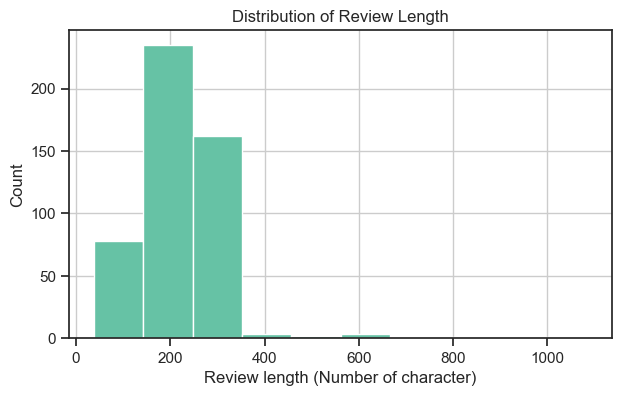

In [15]:
review_length = df.REVIEWS.dropna().map(lambda x: len(x))
sns.set_context(context="talk")
sns.set(palette='Set2', rc={"figure.figsize": (20, 10)}, style="ticks")
plt.figure(figsize=(7, 4))
review_length.loc[review_length<2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [16]:
review_length.skew()

8.545920555484571

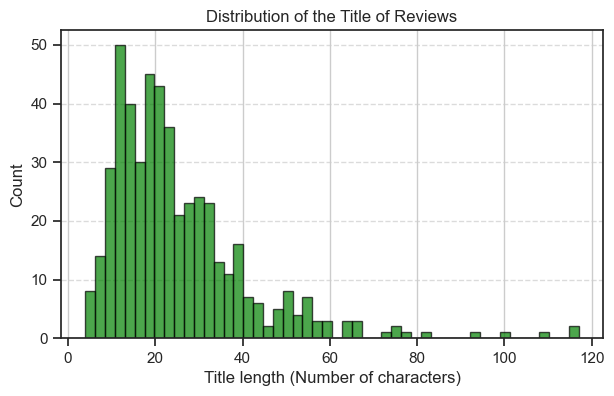

In [17]:
title_length = df.TITLE.dropna().map(lambda x: len(x))

plt.figure(figsize=(7, 4))

title_length.loc[review_length < 1500].hist(bins=50, color='green', edgecolor='black', alpha=0.7)

plt.title("Distribution of the Title of Reviews")
plt.xlabel('Title length (Number of characters)')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [18]:
title_length.skew()

2.102132356541155

In [19]:
# Creating a combined column for both reviews and title
df['combined'] = df['REVIEWS']+" "+ df['TITLE']

In [20]:
df.drop(columns= ['REVIEWS','TITLE'], inplace= True)

In [21]:
#Checking the number of reviews per year with which year had more good reviews
df['DATE'] = pd.to_datetime(df['DATE'])

In [22]:
df['YEAR'] = df['DATE'].dt.year

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 69
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NAME      488 non-null    object        
 1   DATE      488 non-null    datetime64[ns]
 2   RATINGS   488 non-null    int64         
 3   combined  488 non-null    string        
 4   YEAR      488 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1), string(1)
memory usage: 21.0+ KB


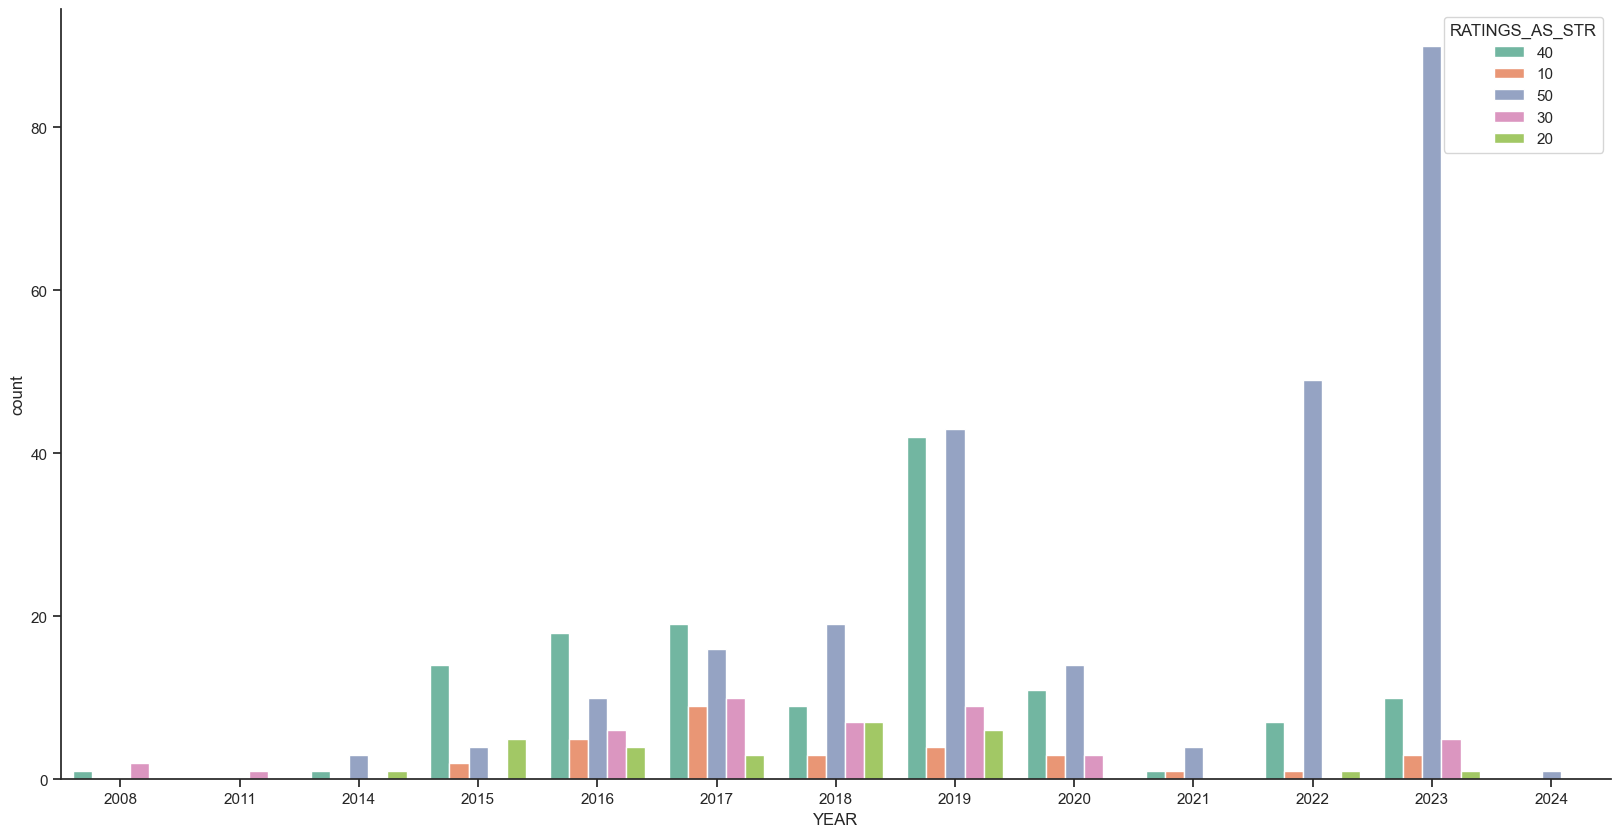

In [24]:
# Plot
df['RATINGS_AS_STR'] = df['RATINGS'].astype(str)
ax = sns.countplot(x = 'YEAR',hue ='RATINGS_AS_STR', data = df)
sns.despine()

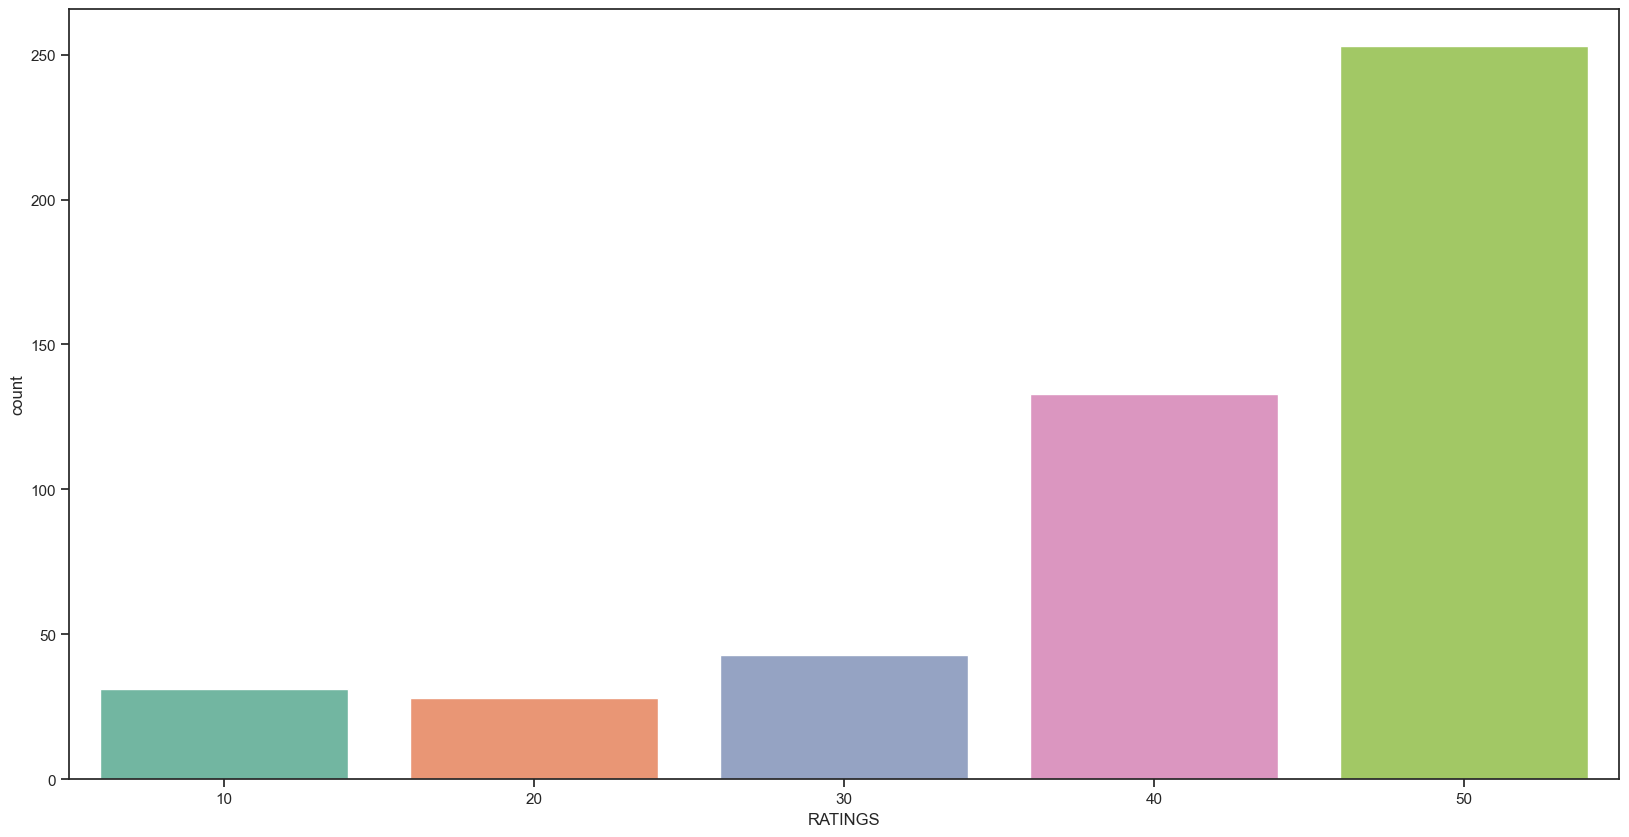

In [25]:
#checking for the number of ratings we have for each value
ax = sns.countplot(x = 'RATINGS', data = df)

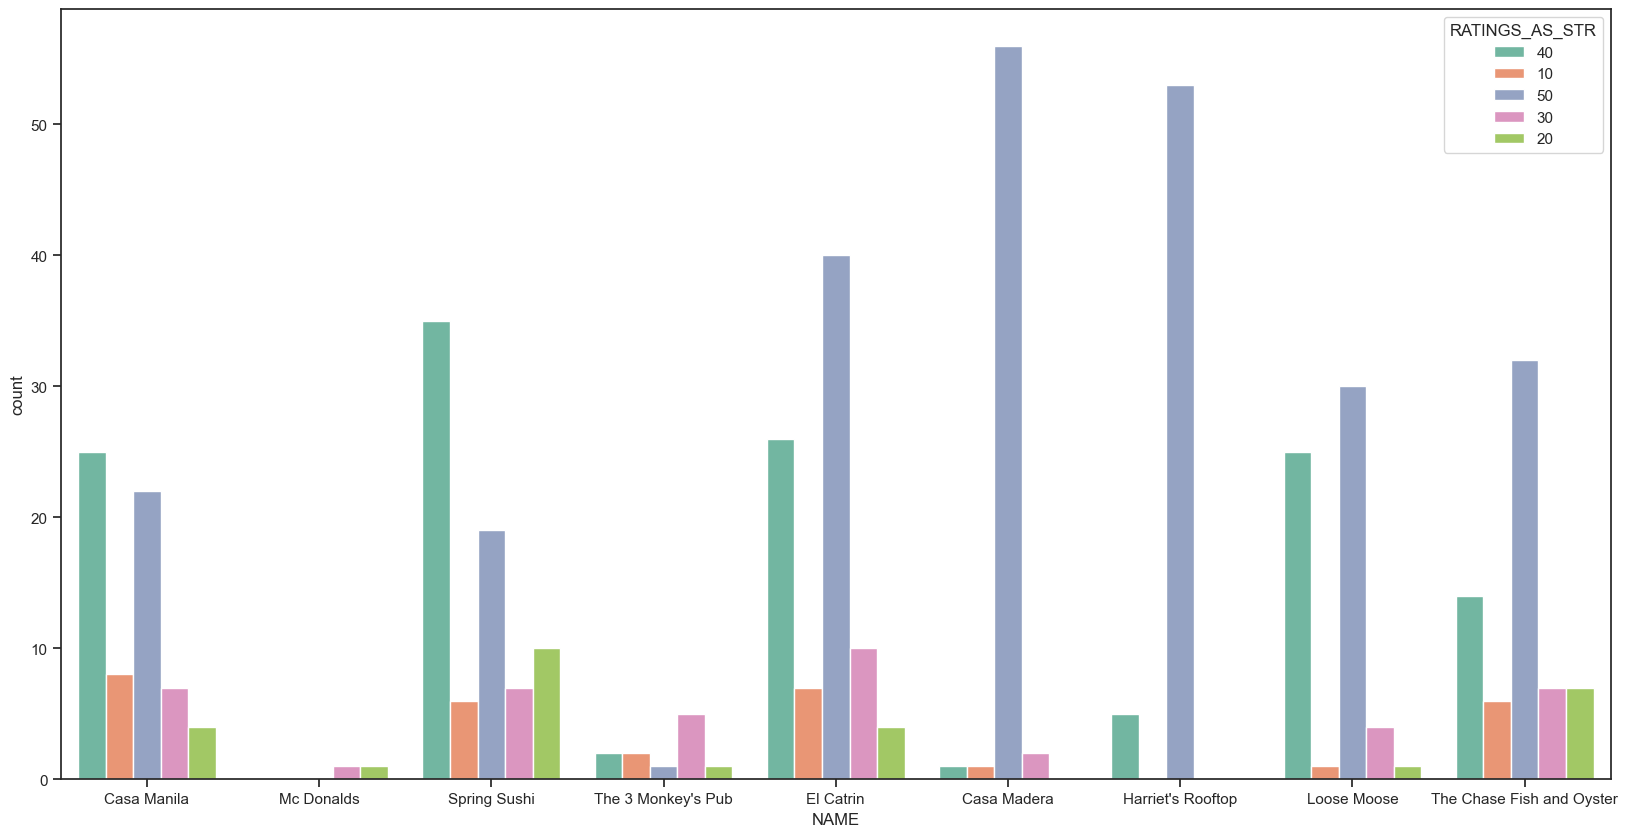

In [26]:
ax = sns.countplot(x = 'NAME', data = df, hue='RATINGS_AS_STR')

### Pandas Profiling

In [69]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("C:\\Users\\Devjp\\Desktop\\AML Project\\AML Project\\pandas_profiling_report.html")

# Creating Functions for Text cleansing:
- Removal of Stop Words.
- Punctuation and Special Characters Removal.
- Lower Case.
- Length of the Text.
- Removing Digits.
- Drop columns
- Lemmatization
- Word Cloud
- Removing Length from words
- Removing meaningless words

### Removed STOP Words

In [27]:
from wordcloud import STOPWORDS
#Function to check stopwords as well as remove them

s_words= list(stopwords.words('english'))
from collections import Counter
c = Counter()

extra_s= ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
          "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
          "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
          'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','realli','now','got','man','people','a',
          'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've", 'publications', 'publication',
          'aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven', 'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",'writer','review','pages','issue','document']
stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

def remove_stopwords(df,column,freq):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in freq ]))

In [28]:
# Function to convert everything to Lower

def to_lower(df, from_column, to_column):
    df[to_column] = df[from_column].apply(lambda x: str(x).lower())
    df.drop(from_column, axis = 1, inplace = True)

In [29]:
#Function to check review length

def to_length(df, from_column, to_column):
    df[to_column] = df[from_column].apply(lambda x: len(str(x)))

In [30]:
#Function to drop unecessary columns

def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis = 1, inplace = True)

In [31]:
#Function to check and replace punctuation

import string
def punctuator(df,column):
    df[column] = df[column].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))

In [32]:
#Function to remove digits in between our words

def remove_digits(df,column):
      df[column] = df[column].apply(lambda x: ' '.join(''.join(char if char.isalpha() or char.isspace() else ' ' for char in word) for word in str(x).split()))

In [33]:
#Function to check if the spelling is correct or not 

def remove_meaningless(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([str(TextBlob(word).correct()) for word in x.split()]))

In [34]:
#Function to check alphabet recurring more than twice

def remove_len(df, column):
    p = re.compile(r'(.)\1{2,}')
    df[column] = df[column].apply(lambda x: ' '.join([p.sub(r'\1\1',word) for word in x.split()]))

In [35]:
#Function to remove emojis

import emoji
def remove_emojii(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([emoji.replace_emoji(word, replace='') for word in x.split()]))

### Lemmatization

In [36]:
#Function to lemmatize the words

def lemmatize(df,column):
      df[column] = df[column].apply(lambda x: ' '.join([nltk.WordNetLemmatizer().lemmatize(word) for word in x]))

### Create Wordcloud

In [37]:
#Function to create a Word Cloud

def word_cloud(text):
    stopword_list = set(stop_words)
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='black',
                           stopwords = stopword_list,
                           min_font_size = 12).generate_from_text(text)
    plt.figure(figsize = (8, 6))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

### Calling all the functions

In [38]:
punctuator(df, column = 'combined')

In [39]:
remove_digits(df, column = 'combined')

In [40]:
to_length(df=df, from_column='combined', to_column='text_len')

In [41]:
to_lower(df=df, from_column='combined', to_column='review_plus_title')

In [42]:
remove_stopwords(df=df, column ='review_plus_title', freq=[])

In [43]:
remove_emojii(df=df, column ='review_plus_title')

In [44]:
remove_meaningless(df=df, column ='review_plus_title')

In [45]:
remove_len(df=df, column ='review_plus_title')

In [46]:
from collections import Counter
c = Counter()
for txt in df.review_plus_title.values:
    for word in txt.split():
        c[word] += 1
c.most_common(10)

[('food', 336),
 ('service', 237),
 ('restaurant', 123),
 ('amazing', 119),
 ('place', 99),
 ('time', 87),
 ('such', 87),
 ('experience', 86),
 ('nice', 82),
 ('dinner', 81)]

In [ ]:
set([w for (w, wc) in c.most_common()[:-29:-1]])

In [ ]:
mc = c.most_common(10)

In [ ]:
df2 = pd.DataFrame(mc,columns=["word","freq"])
df2.head()

In [ ]:
fig = px.bar(df2, x='word', y='freq',
             hover_data=['word', 'freq'], color='freq',
             title='Most Common 20 Words',
             height=400)
fig.show()

In [ ]:
# Visualizing the word count

df["word count"] = df.review_plus_title.str.len()

fig = px.histogram(df, x="word count", nbins=200, title='Word Count')
fig.show()

In [ ]:
df["word count"] .skew()

In [ ]:
# Checking for outliers depending on Length

plt.boxplot(df['word count'])
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

### Outliers

In [ ]:
l=df2['word'][:].to_list()

In [ ]:
l

In [41]:
# We will deal with the most frequent words as outliers and remove them
def remove_mostfreq(df,column,freq):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in l and word.lower() not in freq ]))
remove_mostfreq(df=df, column ='review_plus_title', freq=[])

KeyError: 'review_plus_title'

1. Quantile-based Flooring and Capping

In [58]:
w_c = df["word count"]

floor = w_c.quantile(0.01)
cap= w_c.quantile(0.99)
w_capped = np.where(w_c < floor , floor, w_c)
w_capped = np.where(w_c > cap , cap, w_c)

In [59]:
print('Floor: ', floor)
print('Cap: ',cap)

Floor:  63.61
Cap:  416.0599999999997


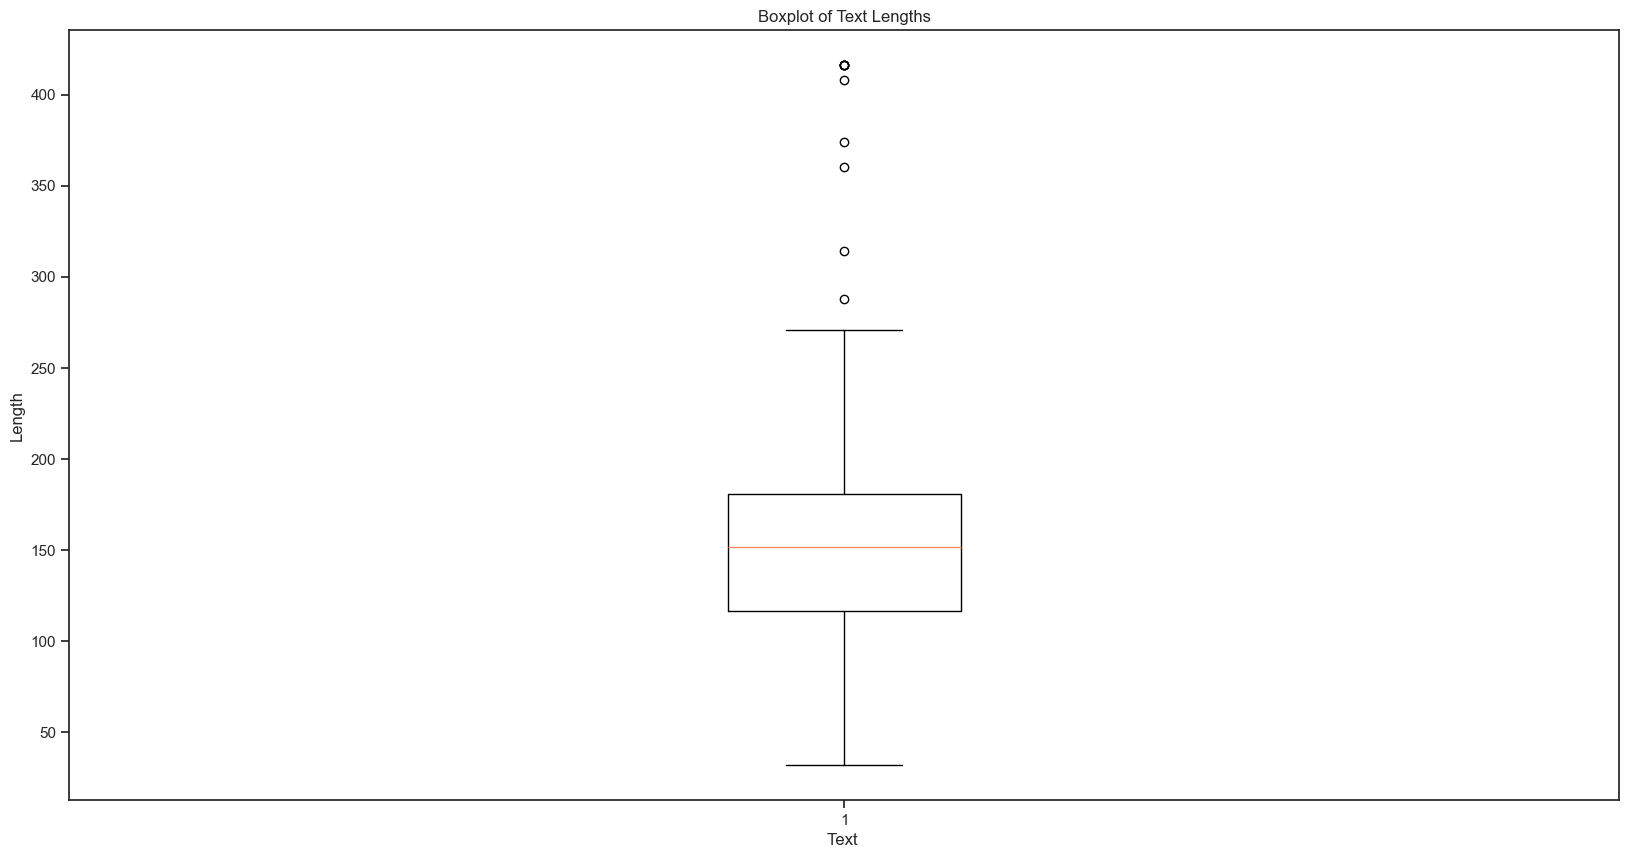

In [60]:
plt.boxplot(w_capped)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

2. Trimming

In [61]:
trim_percentage = 5
lower_trim = np.percentile(w_c, trim_percentage)
upper_trim = np.percentile(w_c, 100 - trim_percentage)
w_trimmed = w_c[(w_c >= lower_trim) & (w_c<= upper_trim)]

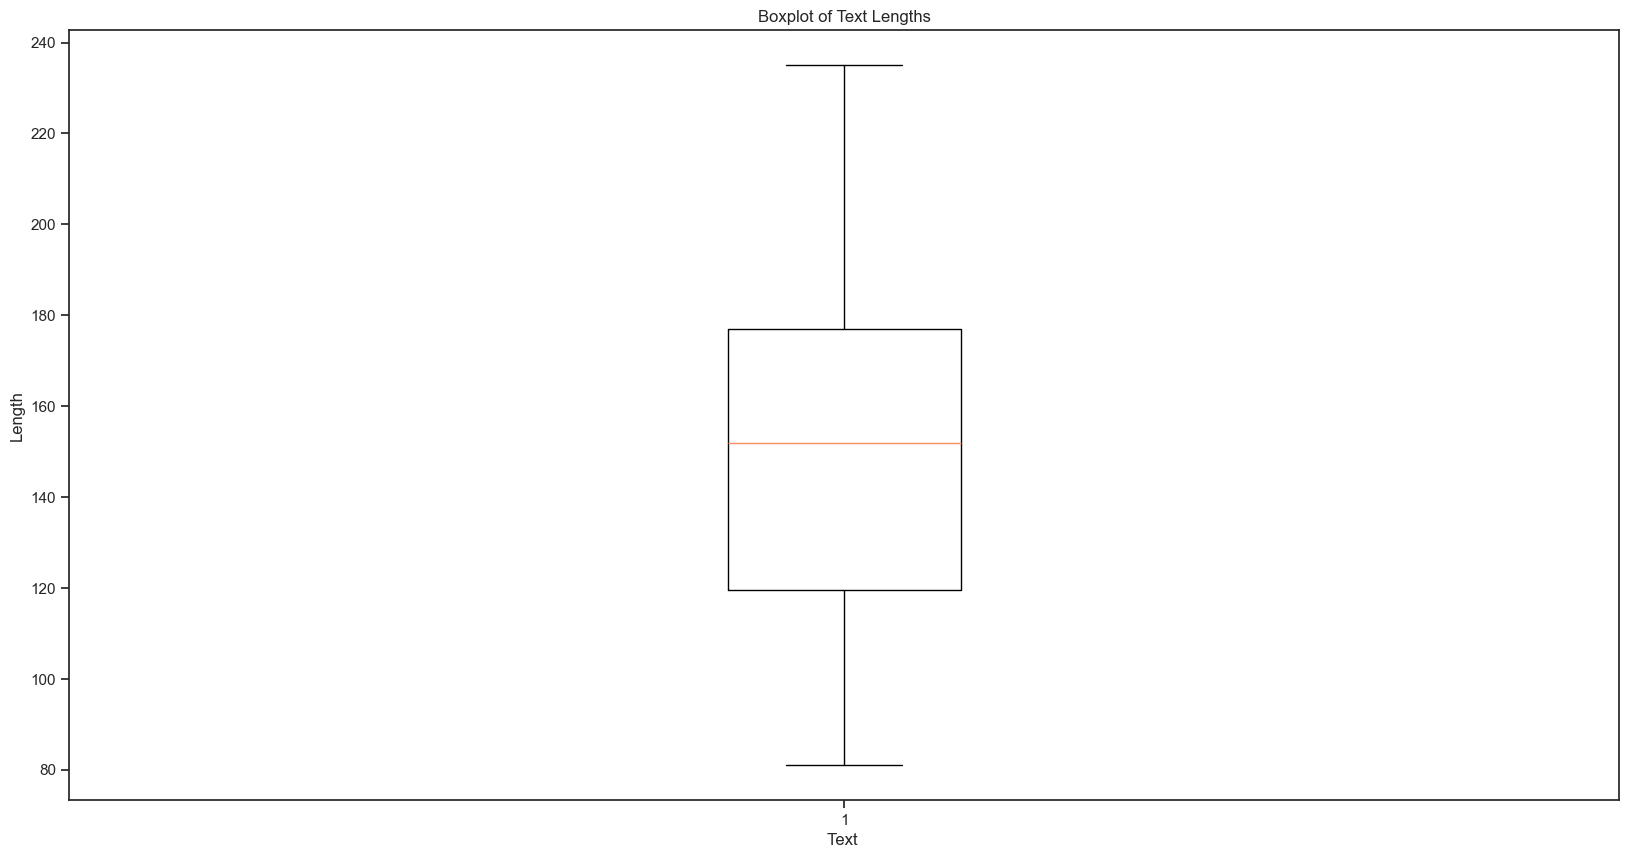

In [62]:
plt.boxplot(w_trimmed)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

3. Log Transformation

In [63]:
w_log_transformed = np.log(w_c)

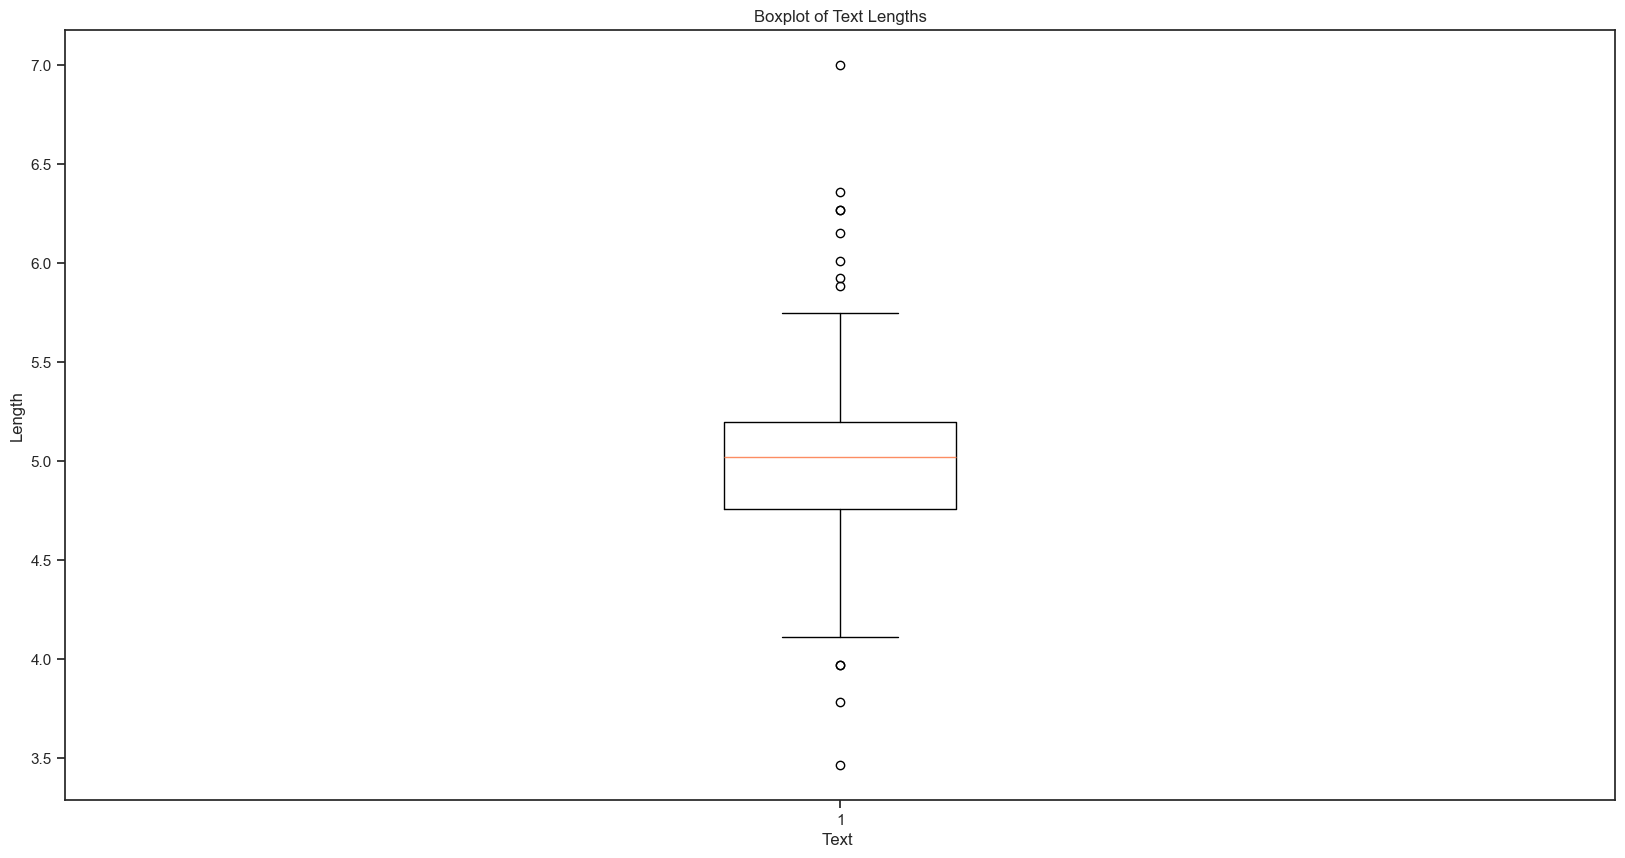

In [64]:
plt.boxplot(w_log_transformed)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

Upon examination, we found that while employing the three outlier detection methods for the word count, which actually represents the total length of reviews, in order to filter out reviews with minimal or maximal lengths, methods 1 and 3 exhibit outliers. Consequently, we have opted for trimming, which demonstrates a satisfactory distribution and lacks any outliers, unlike the other two methods.

In [65]:
df.shape

(488, 8)

In [66]:
trim_percentage = 5
lower_trim = np.percentile(df['word count'], trim_percentage)
upper_trim = np.percentile(df['word count'], 100 - trim_percentage)
index = df[(df['word count'] <= lower_trim) |(df['word count']>= upper_trim)].index

In [67]:
index.shape

(52,)

In [68]:
df.drop(index, inplace=True)
df.shape

(275, 8)

<Axes: >

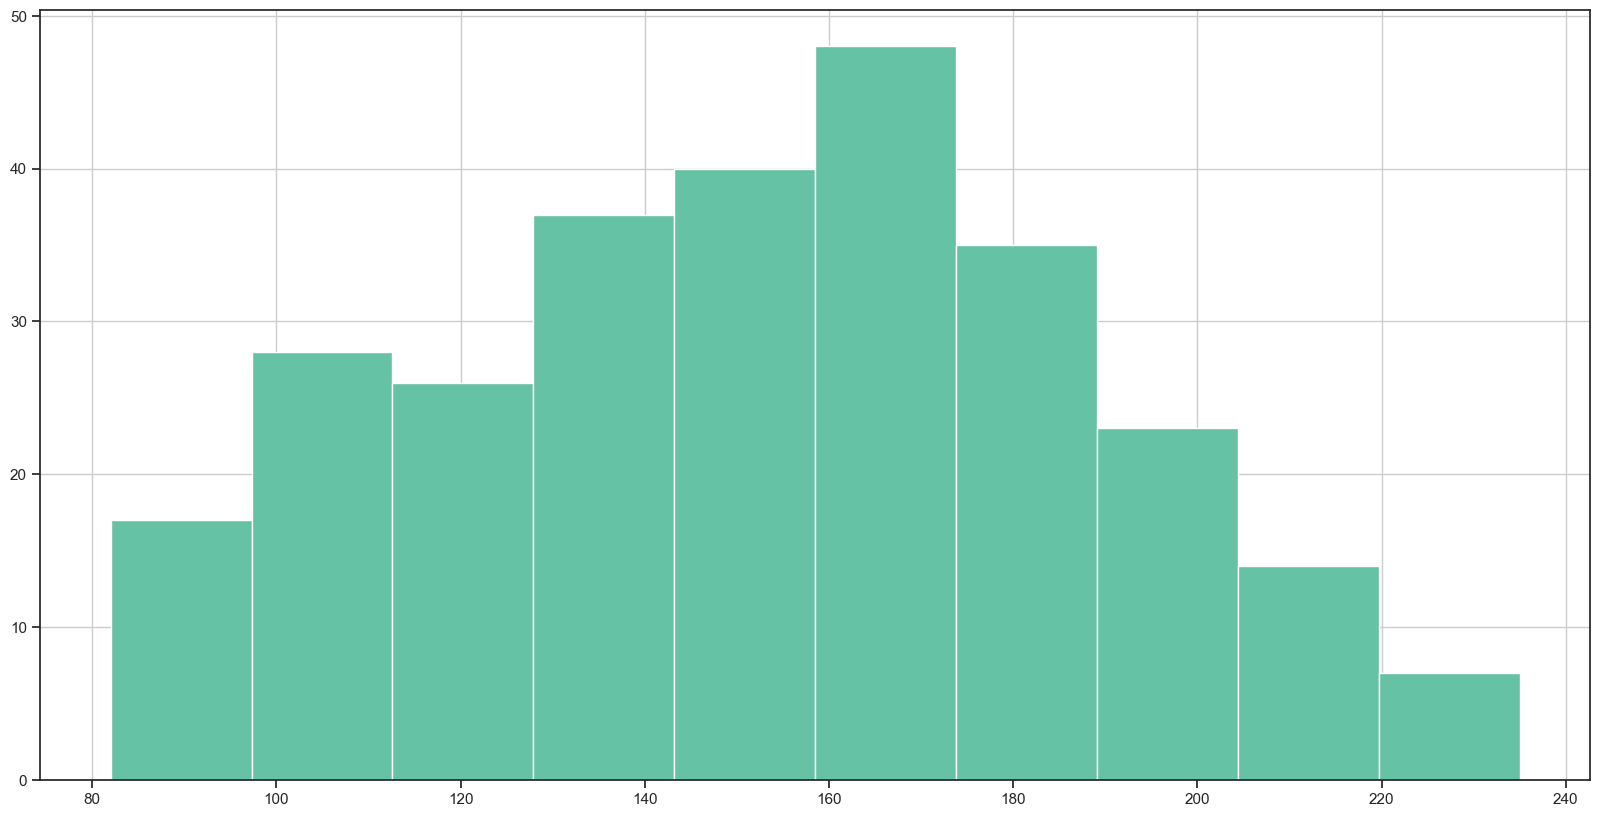

In [69]:
df['word count'].hist()

__The following columns are dropped as to keep the combined column to build our model__

In [70]:
drop_columns(df=df, columns=['NAME', 'DATE', 'RATINGS', 'YEAR', 'RATINGS_AS_STR', 'text_len', 'word count'])

In [71]:
df.columns

Index(['review_plus_title'], dtype='object')

In [72]:
df.head(5)

,review_plus_title
1,price high enough portion unbelievably small serving plates overlie give impression big order taste questionable late maybe new cook portions small
4,door tropical absence attractive always sometimes come large family groupthis exception everyone left full happy
5,quite fun philippine ordered kamayan feast everything eaten hand whole table covered banana leaves plate fun friends family gathering interesting
13,taste found portions small given amount money paid comb lot plus side lumen freemore mummy
15,recommend reservations saturday lunch offer buffets decided ordering menu wide variety filipino dishes excellent birthday party


__Tokenization:__ Creating word tokens for each and every words

In [73]:
text_review = df['review_plus_title']
text_review = text_review.dropna()
tokenized_review = text_review.apply(lambda x: word_tokenize(str(x)))

In [74]:
tokenized_review

1                                                   [price, high, enough, portion, unbelievably, small, serving, plates, overlie, give, impression, big, order, taste, questionable, late, maybe, new, cook, portions, small]
4                                                                                            [door, tropical, absence, attractive, always, sometimes, come, large, family, groupthis, exception, everyone, left, full, happy]
5                                                      [quite, fun, philippine, ordered, kamayan, feast, everything, eaten, hand, whole, table, covered, banana, leaves, plate, fun, friends, family, gathering, interesting]
13                                                                                                                 [taste, found, portions, small, given, amount, money, paid, comb, lot, plus, side, lumen, freemore, mummy]
15                                                                           [recommend, reservations, saturday,

In [75]:
len(tokenized_review)

275

__Saving it to our DF by creating a new column called Tokenized_review__

In [76]:
df['tokenized_review']= tokenized_review

In [77]:
lemmatize(df=df, column = 'tokenized_review')

In [78]:
drop_columns(df=df, columns=['review_plus_title'])

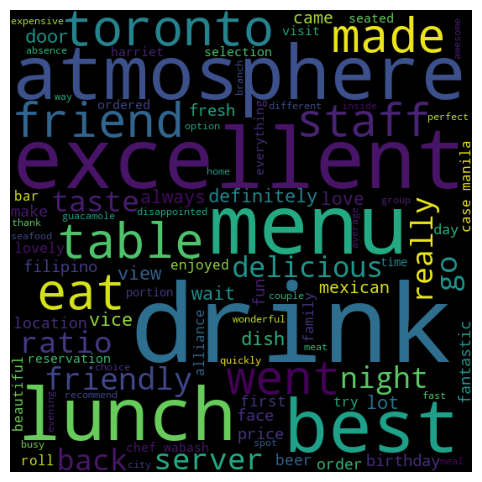

In [79]:
paragraph=' '.join(df.tokenized_review.tolist())
word_cloud(paragraph)

## Methods to convert text into vector

Bag of Words




TF-IDFdf

In [80]:
# truncated SVD for dimesionality reduction for 100 dimensions
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50,n_iter=10)

### 1. Bag of Words (BoW)

In [81]:
bow_vect = CountVectorizer().fit_transform(df['tokenized_review'])

In [82]:
bow_vect.shape

(275, 1709)

In [83]:
bow_data=svd.fit_transform(bow_vect)

In [84]:
from sklearn.preprocessing import StandardScaler
bow = StandardScaler(with_mean=False).fit_transform(bow_data)
print("bow :",bow.shape)

bow : (275, 50)


### 2.TF-IDF

In [85]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2)).fit_transform(df['tokenized_review'])

In [86]:
tfidf_vect.get_shape()

(275, 6331)

In [87]:
tfidf_data=svd.fit_transform(tfidf_vect)

In [88]:
tfidf = StandardScaler(with_mean=False).fit_transform(tfidf_data)
print("tfidf :",tfidf.shape)

tfidf : (275, 50)


# Clustering 

K-Means clustering


Hierarchical Clustering

## 1.K-Means clustering

In [89]:
# Cluster range
cluster_range=list(range(2,16))

In [90]:
optimal_score_bow = []
    
for i in tqdm(range(len(cluster_range))):
    kmeans = KMeans(n_clusters = cluster_range[i],random_state=1).fit(bow)
    optimal_score_bow.append(kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 78.91it/s]


In [91]:
Optimal_cluster_bow = np.argmin(optimal_score_bow) + 2 
print("The optimal number of clusters == ", Optimal_cluster_bow)
print("The loss for optimal cluster is ==  ", min(optimal_score_bow))

The optimal number of clusters ==  15
The loss for optimal cluster is ==   11353.145361831892


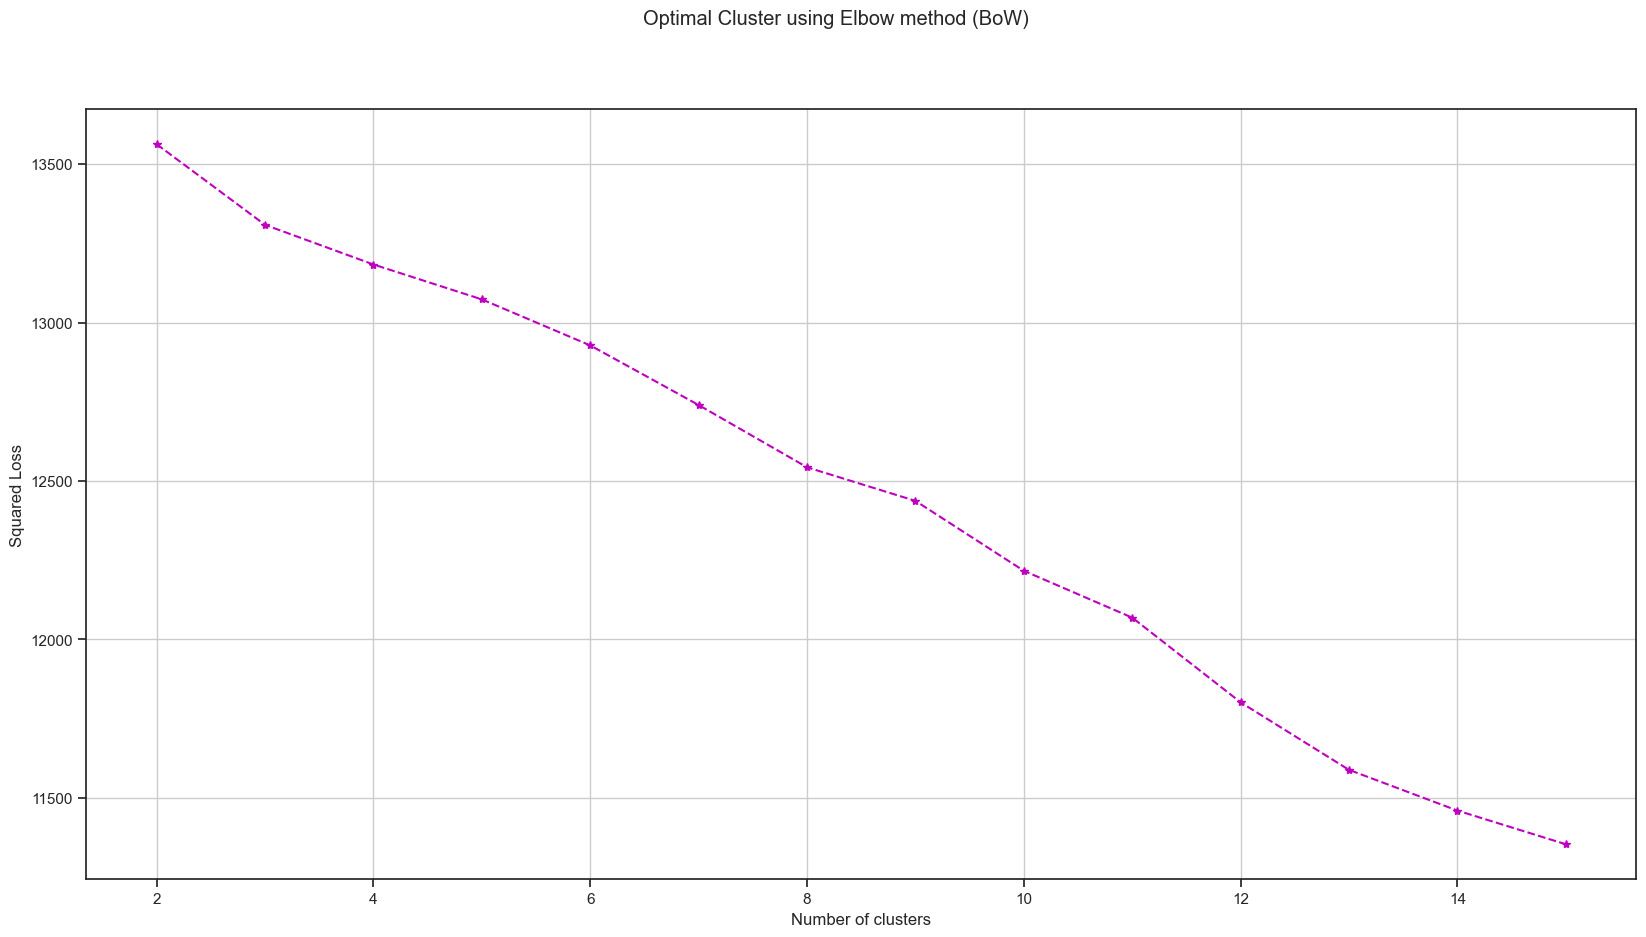

In [92]:
plt.suptitle('Optimal Cluster using Elbow method (BoW)')       
plt.plot(cluster_range, optimal_score_bow,'m*',linestyle='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("Squared Loss")
plt.grid()
plt.show()

In [93]:
optimal_score_tfidf = []
    
for i in tqdm(range(len(cluster_range))):
    kmeans = KMeans(n_clusters = cluster_range[i],random_state=1).fit(tfidf)
    optimal_score_tfidf.append(kmeans.inertia_)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 212.71it/s]


In [94]:
Optimal_cluster_tfidf = np.argmin(optimal_score_tfidf) + 2 
print("The optimal number of clusters == ", Optimal_cluster_tfidf)
print("The loss for optimal cluster is ==  ", min(optimal_score_tfidf))

The optimal number of clusters ==  15
The loss for optimal cluster is ==   11274.883981021963


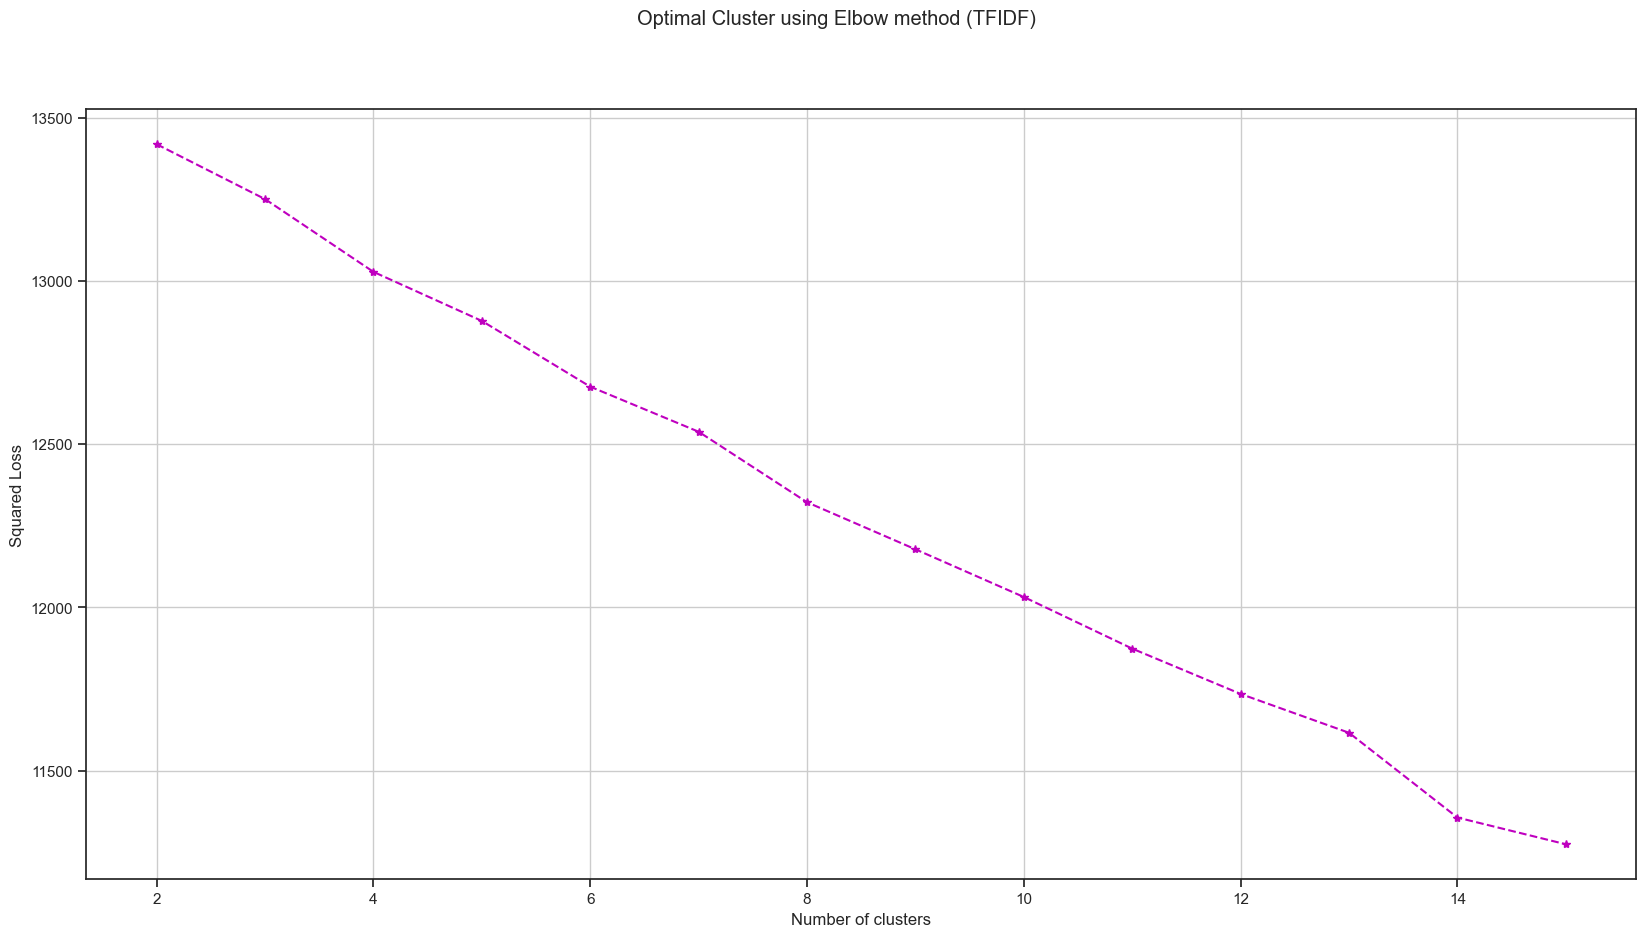

In [95]:
plt.suptitle('Optimal Cluster using Elbow method (TFIDF)')       
plt.plot(cluster_range, optimal_score_tfidf,'m*',linestyle='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("Squared Loss")
plt.grid()
plt.show()

In [96]:
kmeans_bow = KMeans(n_clusters=15, random_state=1).fit(bow)
kmeans_tfidf= KMeans(n_clusters=15, random_state=1).fit(tfidf)

In [97]:
y = np.array(df['tokenized_review'])

### BoW

In [98]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(kmeans_bow.labels_.shape[0]):
    if kmeans_bow.labels_[i] == 0:
        cluster1.append(y[i])
    elif kmeans_bow.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [99]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  23

No. of reviews in Cluster-15 :  2


In [100]:
# Reviews for cluster 1
for i in range(1):
    print('Review: ', cluster1[i])

Review:  taste found portion small given amount money paid comb lot plus side lumen freemore mummy


In [101]:
# Reviews for cluster 15
for i in range(2):
    print('Review: ', cluster15[i])

Review:  friend originally philippine came warm gracious welcome disappoint enjoyed fried latter dessert halo halo filipino beer san miguelnot fun trying philippine first filipino restraint
Review:  lunch family friend california friend wanted typical filipino reason took often eat fried milkfish rising lying halo halo lech plan kinilaw dont kinilaw though more filipino


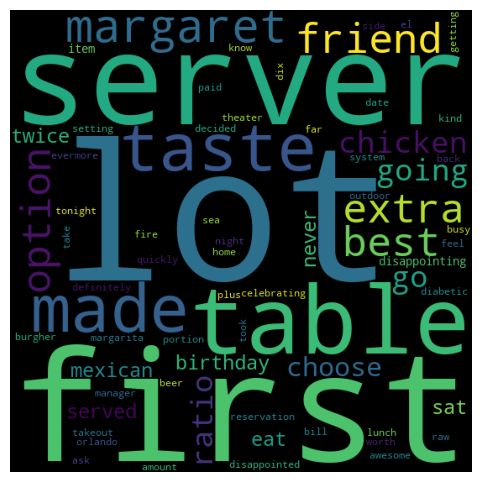

In [102]:
# Wordcloud for review 1

c1 =' '.join(cluster1)
word_cloud(c1)

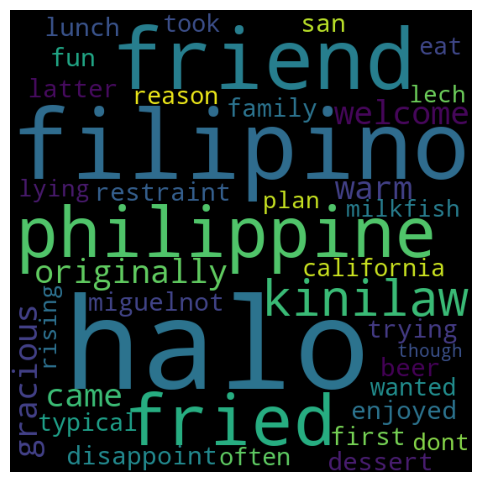

In [103]:
# Wordcloud for review 1

c15 = ' '.join(cluster15)
word_cloud(c15)

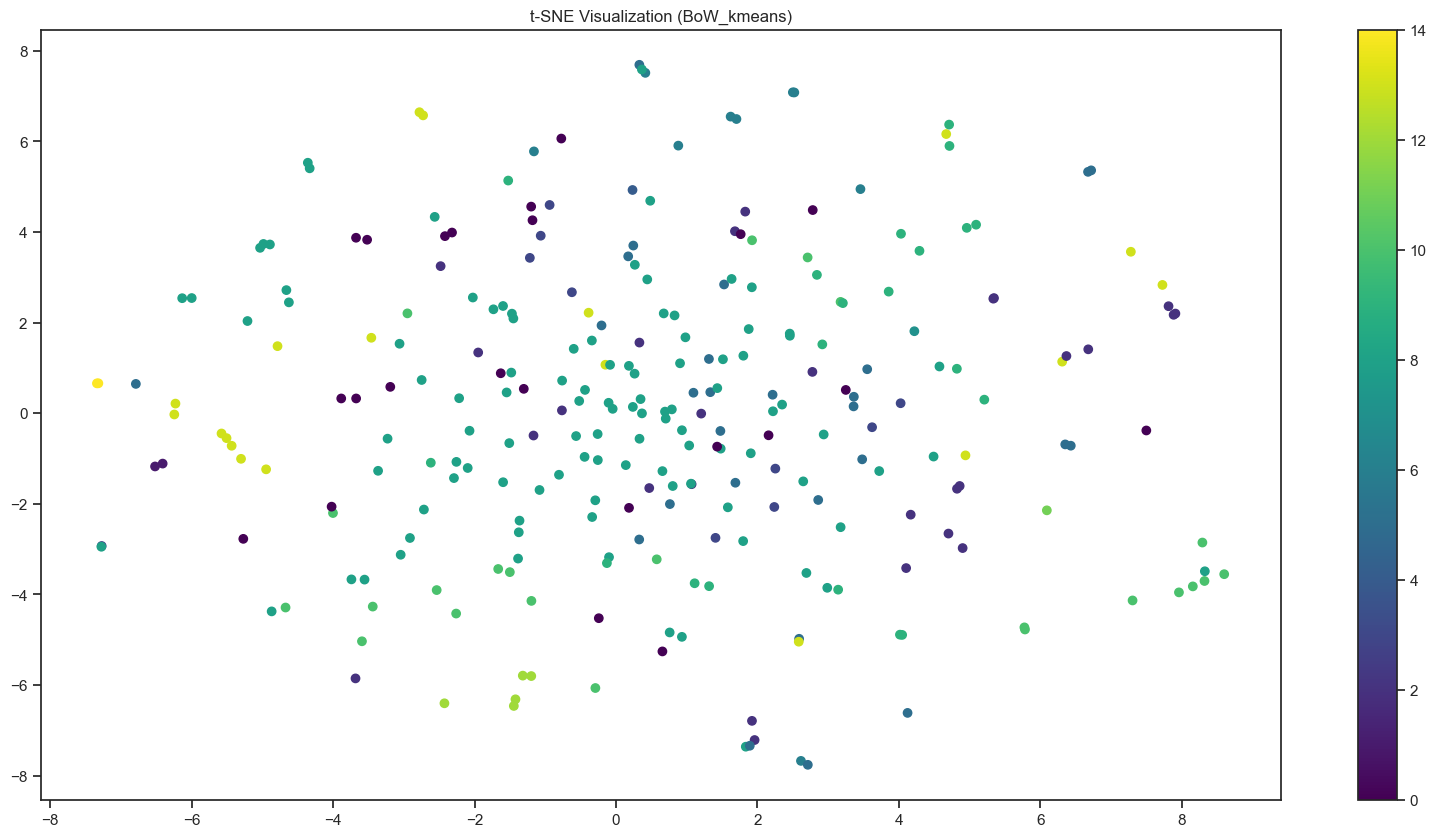

In [104]:
from sklearn.manifold import TSNE

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_results = tsne.fit_transform(bow)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_bow.labels_, cmap='viridis')
plt.title('t-SNE Visualization (BoW_kmeans)')
plt.colorbar()
plt.show()

In [105]:
from sklearn.metrics import silhouette_score
silhouette_score_bow = silhouette_score(bow, kmeans_bow.labels_)
print("Silhouette Score (BoW_kmeans):", silhouette_score_bow)

Silhouette Score (BoW_kmeans): 0.01699383487572243


### TFIDF

In [106]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(kmeans_tfidf.labels_.shape[0]):
    if kmeans_tfidf.labels_[i] == 0:
        cluster1.append(y[i])
    elif kmeans_tfidf.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [107]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  32

No. of reviews in Cluster-15 :  15


In [108]:
# Reviews for cluster 1
for i in range(2):
    print('Review: ', cluster1[i])

Review:  made reservation summerlicious still needed wait minute door acknowledged staff member seated quickly empty table waitresshostess placed venus table leftmore poor worse
Review:  probably inappropriate title came first mind called made reservation seated minute looking menu placed order noticed warm therefore tropical weather included


In [109]:
# Reviews for cluster 15
for i in range(2):
    print('Review: ', cluster15[i])

Review:  went case madura last week celebrate friend birthday duck face la rock nine set made sure felt lip highly recommend night
Review:  robert serving date night friend exceptional recommendation server look forward visiting w robert


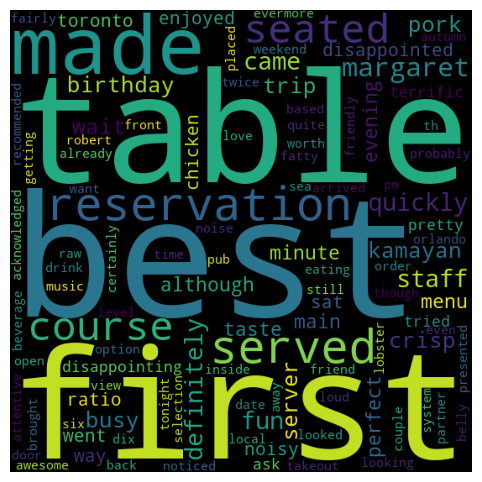

In [110]:
# Wordcloud for review 1

c1 =' '.join(cluster1)
word_cloud(c1)

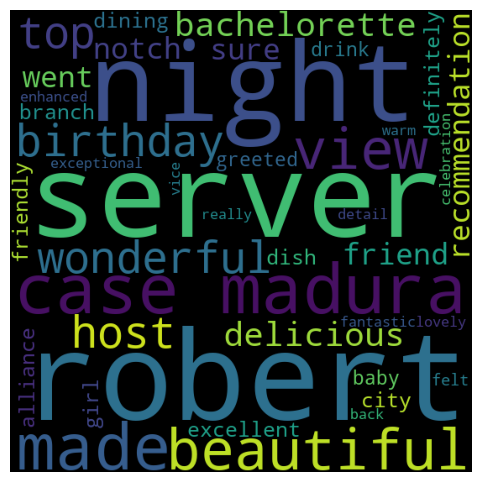

In [111]:
# Wordcloud for review 1

c15 = ' '.join(cluster15)
word_cloud(c15)

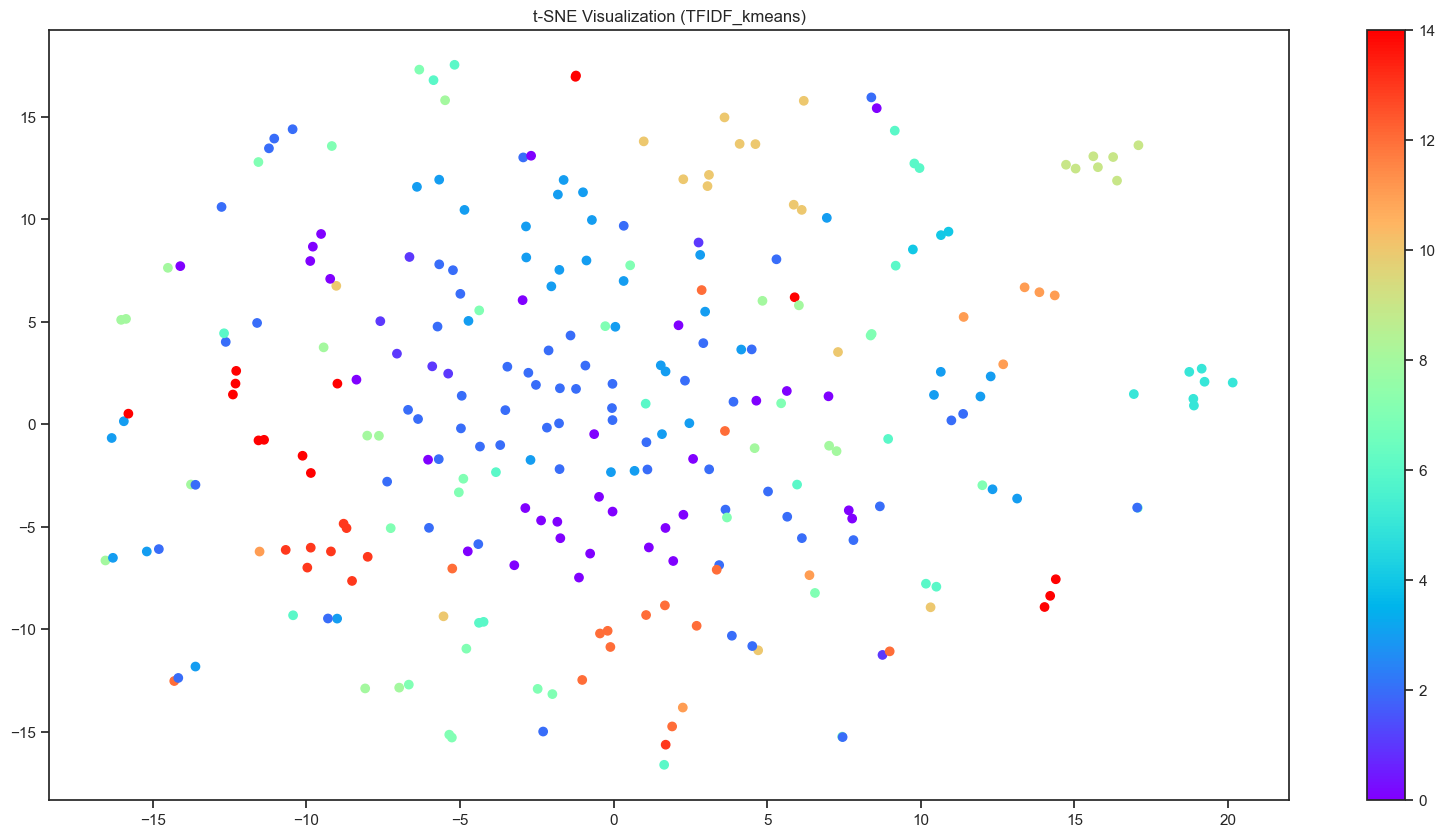

In [112]:
# Visualize clusters using t-SNE

tsne_results = tsne.fit_transform(tfidf)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_tfidf.labels_, cmap='rainbow')
plt.title('t-SNE Visualization (TFIDF_kmeans)')
plt.colorbar()
plt.show()

In [113]:
from sklearn.metrics import silhouette_score
silhouette_score_tfidf = silhouette_score(tfidf, kmeans_tfidf.labels_)
print("Silhouette Score (TFIDF):", silhouette_score_tfidf)

Silhouette Score (TFIDF): 0.04136302611882507


## 2.Hierarchical Clustering

### BoW

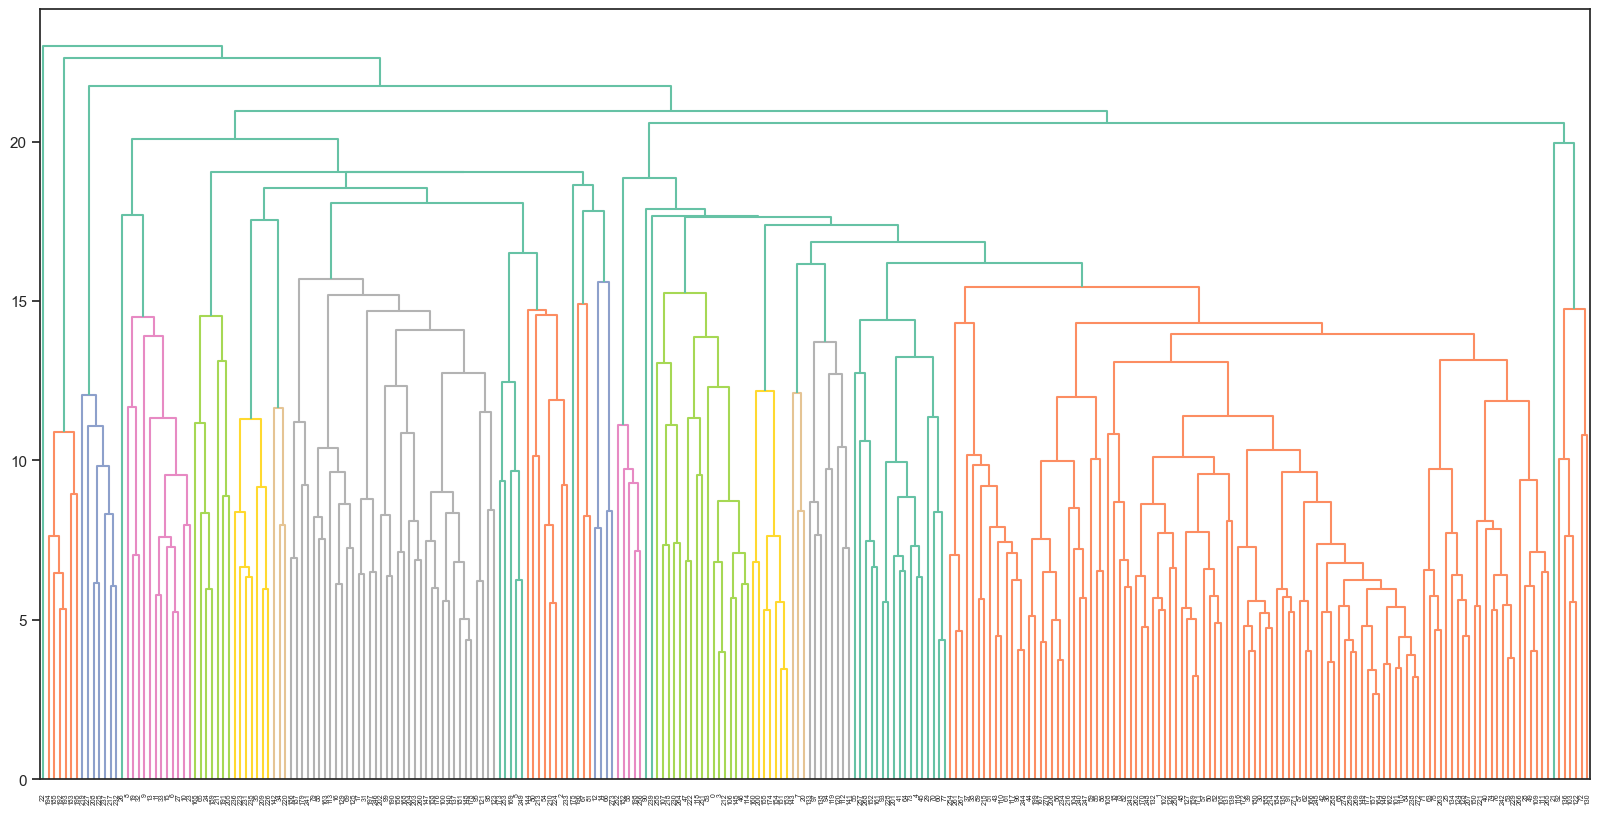

In [114]:
dendro=hierarchy.dendrogram(hierarchy.linkage(bow,method='ward'))

In [115]:
agg_bow = AgglomerativeClustering(n_clusters=15)
agg_bow.fit(bow)

AgglomerativeClustering(n_clusters=15)

In [116]:
agg_bow.labels_

array([ 1,  1,  6,  1,  1,  6,  2,  1,  2,  2,  2,  2,  0,  2,  0,  2, 13,
       13,  1,  2,  1,  7,  8,  2,  3,  1,  2,  2,  1,  1,  1, 13,  2,  2,
        5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  6,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  3,  0,  0,
        1, 13,  1,  1,  4,  1,  1,  1,  1,  1,  1, 13,  6,  0,  1,  1,  1,
        1,  1,  1, 13,  1, 14,  1,  4,  1,  1, 13,  1,  1, 13, 13, 13,  1,
        1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1, 13,  1,  1,  1,  1,  1,
        1,  1, 13,  4, 13,  1, 13,  1,  1,  1, 13,  4,  1,  1,  1,  1,  1,
        4, 13,  1,  1, 13,  1,  5,  1,  6,  1,  1, 13, 13,  1,  1,  1,  1,
        1,  1,  1, 13,  1, 13,  1,  1,  1,  1, 13,  1,  3,  1,  1, 13,  6,
        1,  1,  1,  6,  1, 11, 13,  1, 13, 13,  1, 13, 10, 12,  1, 12, 13,
       13,  1,  3, 13,  3, 12, 12, 12, 12,  0, 13, 10,  1,  1,  1, 13, 13,
       13,  3,  1,  1,  9,  5,  6,  3,  1,  6,  1,  1,  1,  9,  1,  9,  5,
        1,  1,  5,  6,  9

In [117]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(agg_bow.labels_.shape[0]):
    if agg_bow.labels_[i] == 0:
        cluster1.append(y[i])
    elif agg_bow.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [118]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-3 : ",len(cluster15))

No. of reviews in Cluster-1 :  7

No. of reviews in Cluster-3 :  1


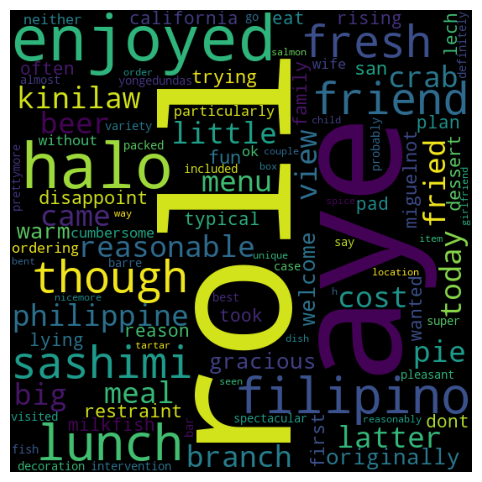

In [119]:
# Wordcloud for review 1

c1 =' '.join(cluster1)
word_cloud(c1)

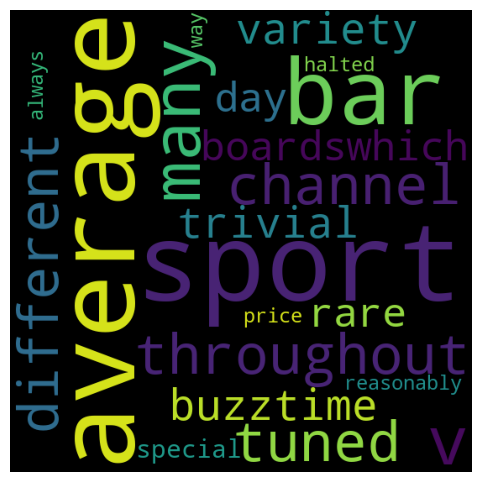

In [120]:
# Wordcloud for review 15

c15 = ' '.join(cluster15)
word_cloud(c15)

In [121]:
# Reviews for cluster 1
for i in range(2):
    print('Review: ', cluster1[i])

Review:  friend originally philippine came warm gracious welcome disappoint enjoyed fried latter dessert halo halo filipino beer san miguelnot fun trying philippine first filipino restraint
Review:  lunch family friend california friend wanted typical filipino reason took often eat fried milkfish rising lying halo halo lech plan kinilaw dont kinilaw though more filipino


In [122]:
# Reviews for cluster 15
for i in range(1):
    print('Review: ', cluster15[i])

Review:  average sport bar many v throughout tuned different sport channel variety buzztime trivial boardswhich rare day special reasonably price average always way halted average sport bar


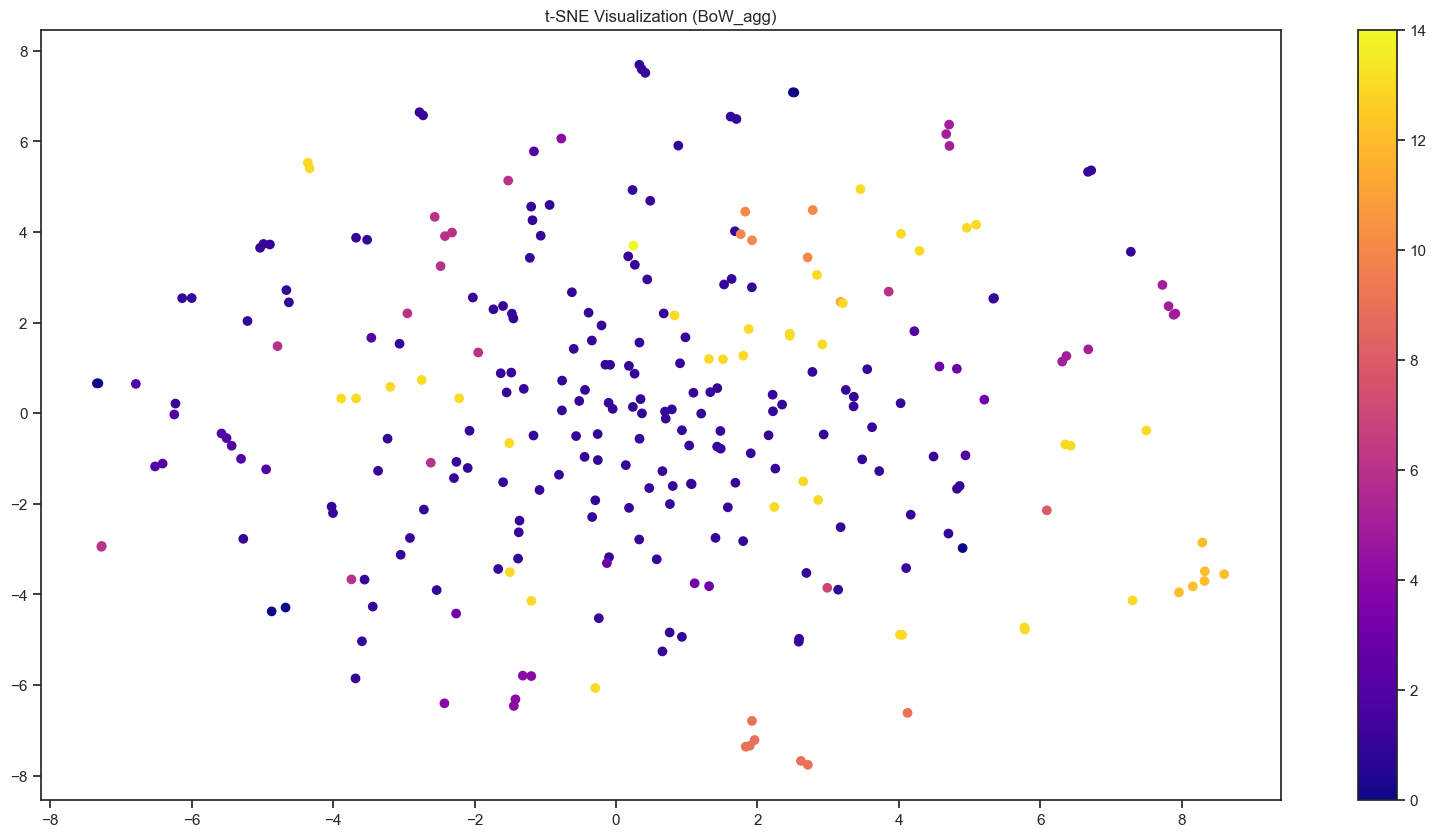

In [123]:
tsne_results = tsne.fit_transform(bow)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_bow.labels_, cmap='plasma')
plt.title('t-SNE Visualization (BoW_agg)')
plt.colorbar()
plt.show()

In [124]:
silhouette_score_agg_bow = silhouette_score(bow, agg_bow.labels_)
print("Silhouette Score (BoW_agg):", silhouette_score_agg_bow)

Silhouette Score (BoW_agg): 0.05014798922482751


### TFIDF

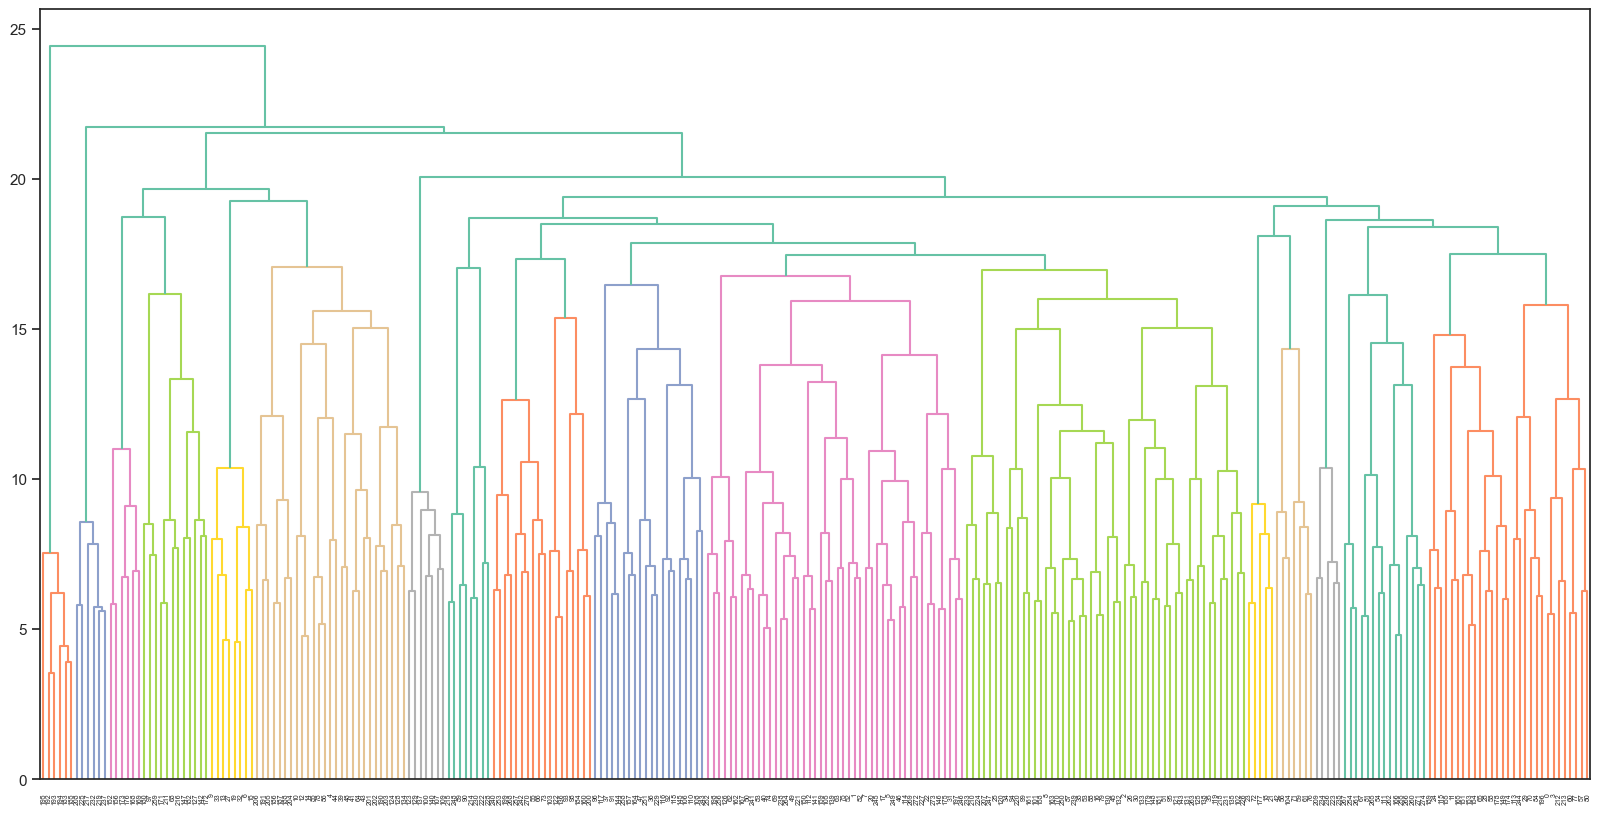

In [125]:
dendro=hierarchy.dendrogram(hierarchy.linkage(tfidf,method='ward'))

In [126]:
agg_tfidf = AgglomerativeClustering(n_clusters=15)
agg_tfidf.fit(tfidf)

AgglomerativeClustering(n_clusters=15)

In [127]:
agg_tfidf.labels_

array([ 1,  0,  0,  1,  3,  0,  8,  0,  0,  8,  3,  1,  3,  8,  3,  8,  0,
        0, 14,  8,  0, 14,  0, 14,  1,  0,  0,  8,  1,  1,  0,  0,  8,  8,
        0,  0,  0,  0,  0,  3,  0,  3,  5,  3,  3,  0,  0,  0,  3,  0,  0,
        0,  0,  0, 13,  2,  5,  1,  1,  5,  1,  5,  0,  0,  3,  1,  2, 13,
        6,  0,  1,  5, 14,  2,  0,  0,  5,  1,  3,  0,  1, 13,  0,  0,  1,
        3,  3,  0,  0,  4,  4,  0,  0,  2,  0,  0,  0,  6,  2,  0,  9,  0,
        0,  2,  5,  0,  0,  9,  0,  9,  0, 13,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  2,  9,  3,  0,  0,  6,  3,  9,  0,  0,  0,  0,  3,  0,
        2,  9,  0,  0,  9,  0,  6,  0,  0,  0,  0,  6,  0,  1,  0,  1, 10,
        1,  1,  1, 10,  0,  0,  0,  2,  0,  0,  0,  0,  1, 13,  0, 10, 10,
        0,  6,  6, 10,  1,  0, 10, 14,  1,  0,  6,  0,  6,  7,  2,  7,  3,
        3,  3,  1,  3,  3,  7,  7,  7,  7,  1,  0,  0,  2,  2,  3,  3,  3,
        3,  3,  3,  0, 11, 12,  0,  6,  1,  1,  4,  4,  6, 11,  0, 11,  0,
        0,  4, 12,  0, 11

In [128]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(agg_tfidf.labels_.shape[0]):
    if agg_tfidf.labels_[i] == 0:
        cluster1.append(y[i])
    elif agg_tfidf.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [129]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  116

No. of reviews in Cluster-15 :  5


In [130]:
# Reviews for cluster 1
for i in range(2):
    print('Review: ', cluster1[i])

Review:  door tropical absence attractive always sometimes come large family groupthis exception everyone left full happy
Review:  quite fun philippine ordered kamayan feast everything eaten hand whole table covered banana leaf plate fun friend family gathering interesting


In [131]:
# Reviews for cluster 15
for i in range(2):
    print('Review: ', cluster15[i])

Review:  although short stuffed incredible worth wait dish served presented flair garlic rice crisp pork adopt karekare obtain beef crisp paramore perfect night
Review:  friendly staff sadly struggled english started main course came together main course crisp pork belly crisp incredibly fatty pork cooked complained staff nothing paid left fatty pork belly


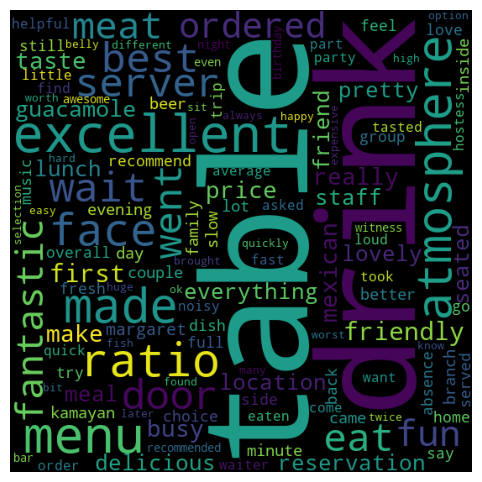

In [132]:
# Wordcloud for review 1

c1 =' '.join(cluster1)
word_cloud(c1)

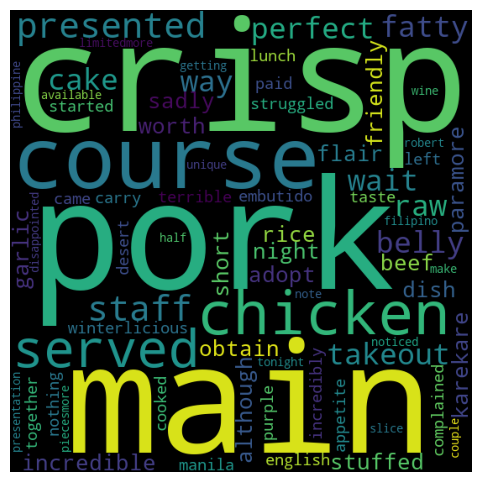

In [133]:
# Wordcloud for review 15

c15 = ' '.join(cluster15)
word_cloud(c15)

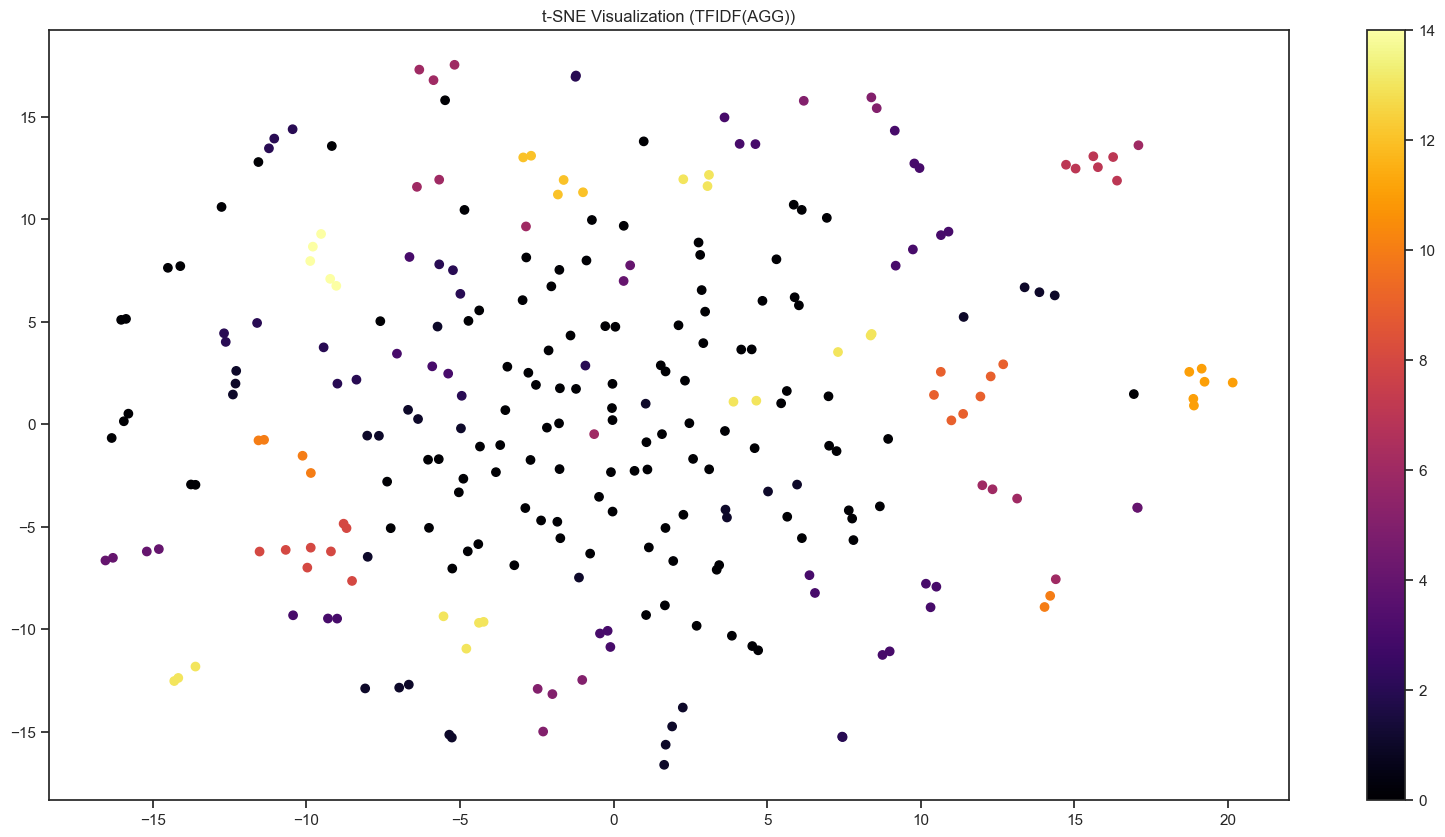

In [134]:
tsne_results = tsne.fit_transform(tfidf)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_tfidf.labels_, cmap='inferno')
plt.title('t-SNE Visualization (TFIDF(AGG))')
plt.colorbar()
plt.show()

In [135]:
silhouette_score_agg_tfidf = silhouette_score(tfidf, agg_tfidf.labels_)
print("Silhouette Score (TFIDF_agg):", silhouette_score_agg_tfidf)

Silhouette Score (TFIDF_agg): 0.055549734681942395
